# Community alignment of training questions

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 5717 vectors at initialization


100%|████████████████████████████████████████████████████████████████████████████████| 709/709 [00:00<00:00, 32730.85it/s]


saved community_gemma3:latest.json


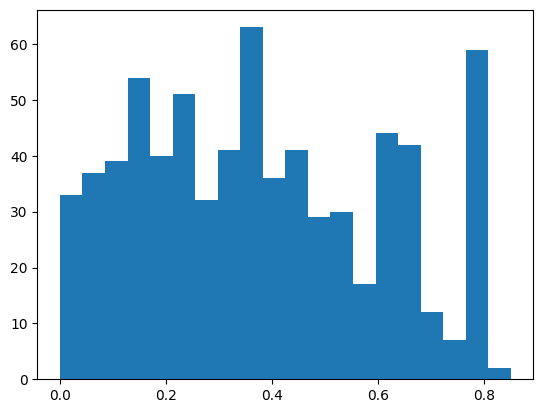

In [4]:
dfs = {}
for model in models:
    df = community_alignment(model)
    dfs[model] = df

In [5]:
for model in models:
    df = dfs[model]
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='id')
    display(df1)

,model,id,title,error
20,gemma3:latest,111,Will there be a total solar eclipse on June 25...,0.600
36,gemma3:latest,161,Will the Universe end?,0.020
89,gemma3:latest,349,Will SpaceX land people on Mars before 2030?,0.348
90,gemma3:latest,353,Will someone born before 2001 live to be 150?,0.110
98,gemma3:latest,372,Will human brain emulation be the first succes...,0.235
...,...,...,...,...
681,gemma3:latest,28570,"Will there be a global recession before 2026, ...",0.250
2,gemma3:latest,28682,Will any country trigger article 50 to leave t...,0.220
64,gemma3:latest,30959,Will the US Department of Health and Human Ser...,0.400
65,gemma3:latest,30960,"Will CDC report 10,000 or more H5 avian influe...",0.620


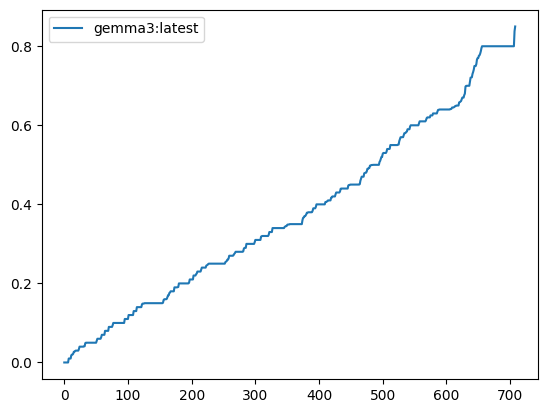

In [6]:
import matplotlib.pylab as plt
errors = []
for model in models:
    df = dfs[model]
    errors.append((model, df.error.median()))
    plt.plot(sorted(df['error'].values.tolist()), label=model)
plt.legend();

In [7]:
dfe = pd.DataFrame(errors, columns = ['model', 'medianError'])

In [8]:
dfe.sort_values(by='medianError')

,model,medianError
0,gemma3:latest,0.35


In [9]:
df1.sort_values(by='error')

,model,id,title,error
351,gemma3:latest,1059,"Before 2051, will a meteor cause more injuries...",0.000
496,gemma3:latest,1432,Will humans have a sustainable off-world prese...,0.000
482,gemma3:latest,1385,Qualia Research Institute Question Series: Wil...,0.000
492,gemma3:latest,7552,Will the Confederate monument on Stone Mountai...,0.000
15,gemma3:latest,26717,"Five years after AGI, will there be widely ava...",0.000
...,...,...,...,...
315,gemma3:latest,7079,How far away is the nearest independent origin...,0.800
244,gemma3:latest,4851,What will be the percentage of the world popul...,0.800
460,gemma3:latest,1341,Drake's Equation 5th Parameter f_i: On what fr...,0.800
567,gemma3:latest,13897,Will a government space agency commence a crew...,0.838


In [10]:
from call_local_llm import call_local_llm

In [11]:
from ollama_models import ollama_models

In [18]:
model = ollama_models()[0]

In [19]:
model

'deepseek-r1:8b-llama-distill-q4_K_M'

In [79]:
id_title = [f'{id},{title}' for id, title in df1[['id', 'title']].values]

In [80]:
id_title[0:10]

['111,Will there be a total solar eclipse on June 25, 2522?',
 '161,Will the Universe end?',
 '349,Will SpaceX land people on Mars before 2030?',
 '353,Will someone born before 2001 live to be 150?',
 '372,Will human brain emulation be the first successful route to human-level digital intelligence?',
 '375,Will any of Belgium, France, Italy, Luxembourg, Netherlands, and/or Germany leave the EU before 2027?',
 '384,Will there be Human-machine intelligence parity before 2040?',
 '397,Will RoboCup announce that robots have beaten professional human soccer players before 2050?',
 '480,If chess is solved before 2080, must perfect play result in white winning?',
 '491,Will China reduce their carbon emissions per GDP by 60% by 2030?']

In [27]:
prompt = f"""You are given a sequence of binary, numeric or multiple choice questions.
DO NOT attempt to answer these questions.
DO find a list of 10 "subject matter expert" (SME) domain descriptions that these questions fall into.
TELL ME your list of 10 SME domains.
DO NOT tell me anything else.
Here are the questions: 

{'\n'.join(df1.title.values)}"""

In [28]:
print(prompt[0:1000])

You are given a sequence of binary, numeric or multiple choice questions.
DO NOT attempt to answer these questions.
DO find a list of 10 "subject matter expert" (SME) domain descriptions that these questions fall into.
TELL ME your list of 10 SME domains.
DO NOT tell me anything else.
Here are the questions: 

Will there be a total solar eclipse on June 25, 2522?
Will the Universe end?
Will SpaceX land people on Mars before 2030?
Will someone born before 2001 live to be 150?
Will human brain emulation be the first successful route to human-level digital intelligence?
Will any of Belgium, France, Italy, Luxembourg, Netherlands, and/or Germany leave the EU before 2027?
Will there be Human-machine intelligence parity before 2040?
Will RoboCup announce that robots have beaten professional human soccer players before 2050?
If chess is solved before 2080, must perfect play result in white winning?
Will China reduce their carbon emissions per GDP by 60% by 2030?
Will any country that had nucl

In [ ]:
print(report)

In [97]:
def chunk_list(lst, chunk_size=10):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]

In [32]:
report2 = call_local_llm(prompt, model)

In [65]:
categories = [x.replace('**', '').replace(': ','').split('. ')[1].replace(':','') for x in report2.split('\n') if '**' in x]

In [100]:
from tqdm.auto import tqdm

In [171]:
def parse_ids(rpt):
    try:
        return eval('['+rpt.split('</think>')[1].split('[')[1].split(']')[0]+']')
    except:
        return []

In [172]:
id_category = {}
for category in tqdm(categories):
    for chunk in tqdm(chunk_list(id_title)):
        rpt = None
        ids = None
        prompt = f"""Here is a comma-separated list of ID,QUESTION.
    Give me the ID of any the questions in the following list which are in the category of {category}.
    DO NOT give me the title of the question or any thoughts on the question.
    I ONLY want to know the ID of questions in category {category}.
    The IDS should be return as a Python list of integers of form [id1,id2,...].  There should be no other text in the answer.   
    
    {'\n'.join(chunk)}"""
        rpt = call_local_llm(prompt, model)
        ids = parse_ids(rpt)   
        for id in ids:
            id_category[id] = category

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

In [173]:
len(id_category)

660

In [174]:
len(id_title)

709

In [175]:
id_category

{375: 'Societal Shifts',
 491: 'Technological Breakthroughs',
 492: 'Societal Shifts',
 610: 'Societal Shifts',
 665: 'Societal Shifts',
 797: 'Societal Shifts',
 1090: 'Military and Conflict',
 1444: 'Societal Shifts',
 1454: 'Societal Shifts',
 1476: 'Technological Breakthroughs',
 1482: 'Health Crises',
 1539: 'Societal Shifts',
 1552: 'Societal Shifts',
 1574: 'Market Performance',
 1576: 'Societal Shifts',
 1579: 'Market Performance',
 1585: 'Societal Shifts',
 1621: 'Technological Breakthroughs',
 1638: 'Political Predictions',
 2534: 'Military and Conflict',
 2605: 'Societal Shifts',
 2619: 'Societal Shifts',
 2621: 'Market Performance',
 2622: 'Market Performance',
 2632: 'Societal Shifts',
 2666: 'Societal Shifts',
 2711: 'Societal Shifts',
 2817: 'Military and Conflict',
 2823: 'Health Crises',
 2937: 'Societal Shifts',
 3019: 'Societal Shifts',
 3042: 'Societal Shifts',
 3124: 'Societal Shifts',
 3125: 'Societal Shifts',
 3150: 'Societal Shifts',
 3191: 'Societal Shifts',
 3

In [177]:
import json
with open('id_category.json', 'w') as f:
    json.dump(id_category, f, indent=4)